<a href="https://colab.research.google.com/github/pratibhaGogi/hello/blob/master/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd #Python Data Analysis Library 
import numpy as np #Python Scientific Library 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
new_names = ['sepal_length','sepal_width','petal_length','petal_width','iris_class']
dataset = pd.read_csv(url, names=new_names, skiprows=0, delimiter=',')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
iris_class      150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
dataset.head(6)

,sepal_length,sepal_width,petal_length,petal_width,iris_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
y = dataset['iris_class']
x = dataset.drop(['iris_class'], axis=1)

print ("dataset : ",dataset.shape)
print ("x : ",x.shape)
print ("y : ",y.shape)

dataset :  (150, 5)
x :  (150, 4)
y :  (150,)


In [5]:
y=pd.get_dummies(y)
y.sample(7)

,Iris-setosa,Iris-versicolor,Iris-virginica
134,0,0,1
0,1,0,0
91,0,1,0
109,0,0,1
110,0,0,1
17,1,0,0
149,0,0,1


In [7]:

from sklearn.model_selection import train_test_split

# Generate Training and Validation Sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3) #0.3 data as data test

#converting to float 32bit
x_train = np.array(x_train).astype(np.float32)
x_test  = np.array(x_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test  = np.array(y_test).astype(np.float32)

#print data split for validation
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(105, 4) (105, 3)
(45, 4) (45, 3)


In [8]:
from sklearn.neural_network import MLPClassifier

#model initialization
Model = MLPClassifier(hidden_layer_sizes=(10,5), max_iter=2000, alpha=0.01, #try change hidden layer
                     solver='sgd', verbose=1,  random_state=121) #try verbode=0 to train with out logging
#train our model
h=Model.fit(x_train,y_train)
#use our model to predict
y_pred=Model.predict(x_test)

Iteration 1, loss = 2.52387966
Iteration 2, loss = 2.48461735
Iteration 3, loss = 2.43318359
Iteration 4, loss = 2.37515938
Iteration 5, loss = 2.31680027
Iteration 6, loss = 2.25961590
Iteration 7, loss = 2.20480629
Iteration 8, loss = 2.15296286
Iteration 9, loss = 2.10572943
Iteration 10, loss = 2.06368019
Iteration 11, loss = 2.02697153
Iteration 12, loss = 1.99554491
Iteration 13, loss = 1.96894619
Iteration 14, loss = 1.94738852
Iteration 15, loss = 1.93049830
Iteration 16, loss = 1.91798372
Iteration 17, loss = 1.90974029
Iteration 18, loss = 1.90393534
Iteration 19, loss = 1.89975480
Iteration 20, loss = 1.89668268
Iteration 21, loss = 1.89414703
Iteration 22, loss = 1.89167646
Iteration 23, loss = 1.88904576
Iteration 24, loss = 1.88610538
Iteration 25, loss = 1.88277101
Iteration 26, loss = 1.87906017
Iteration 27, loss = 1.87505472
Iteration 28, loss = 1.87075903
Iteration 29, loss = 1.86621383
Iteration 30, loss = 1.86164388
Iteration 31, loss = 1.85704026
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


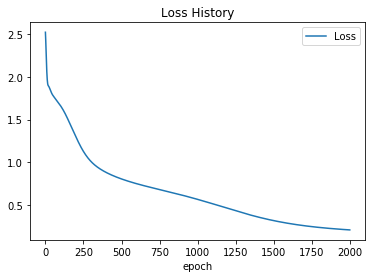

In [9]:
import matplotlib.pyplot as plt

plt.plot(h.loss_curve_)
plt.title('Loss History')
plt.xlabel('epoch')
plt.legend(['Loss'])